# Import

In [2]:
import openeo
import xarray
import matplotlib.pyplot as plt

## Connect to copernicus

In [3]:
connection = openeo.connect("openeo.dataspace.copernicus.eu")

In [4]:

connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.1/' with OidcBearerAuth>

## Load random rectangle

In [ ]:
s2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=(
        "2023-10-26"
    ),
    spatial_extent={
        "west": 8.559718,
        "south": 49.794677,
        "east": 8.752842,
        "north": 49.952662,
        "crs": "EPSG:4326",
    },
    bands=[
        'B04',
        'B08',
    ],
    max_cloud_cover=10,
)

In [101]:
darmstadt_cube_for_ndvi = s2_cube

In [103]:
s2_cube.download("darmstadt_ndvi.nc")

In [62]:
ds = xarray.load_dataset("load-raw.nc")

In [70]:
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04"]].to_array()
print(data)

<xarray.DataArray (variable: 1, t: 1, y: 335, x: 556)>
array([[[[ 564.,  564.,  546., ..., 4260., 3960., 3316.],
         [ 516.,  540.,  540., ..., 4224., 3828., 3196.],
         [ 534.,  536.,  530., ..., 4276., 3760., 3104.],
         ...,
         [2504., 2340., 2180., ...,  400.,  374.,  306.],
         [2452., 2204., 2022., ...,  393.,  346.,  299.],
         [1948., 1730., 1366., ...,  392.,  339.,  294.]]]], dtype=float32)
Coordinates:
  * t         (t) datetime64[ns] 2022-05-07
  * x         (x) float64 7.434e+05 7.434e+05 7.435e+05 ... 7.49e+05 7.49e+05
  * y         (y) float64 6.869e+05 6.869e+05 6.869e+05 ... 6.836e+05 6.836e+05
  * variable  (variable) object 'B04'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform


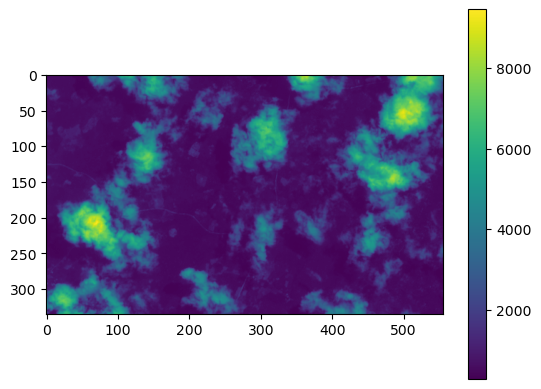

In [69]:
plt.imshow(data[0, 0, :, :])  # Assuming you want to display the first variable and time step
plt.colorbar()
plt.show()

In [72]:
data.head()

<xarray.DataArray (variable: 1, t: 1, y: 5, x: 5)>
array([[[[564., 564., 546., 546., 564.],
         [516., 540., 540., 545., 546.],
         [534., 536., 530., 540., 543.],
         [540., 510., 516., 519., 543.],
         [525., 513., 550., 521., 534.]]]], dtype=float32)
Coordinates:
  * t         (t) datetime64[ns] 2022-05-07
  * x         (x) float64 7.434e+05 7.434e+05 7.435e+05 7.435e+05 7.435e+05
  * y         (y) float64 6.869e+05 6.869e+05 6.869e+05 6.869e+05 6.869e+05
  * variable  (variable) object 'B04'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

## Get all collections and types

In [92]:
collections = connection.list_collections()


In [93]:

collections

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

In [97]:
sentinal_collection = connection.describe_collection("SENTINEL2_L2A")

In [98]:
sentinal_collection

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/Sentinel2.html',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2_L2A_CDAS&fromTime=2023-02-07T00%3A00%3A00.000Z&toTime=

## Get B8 B4 of the Darmstadt forest